In [37]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


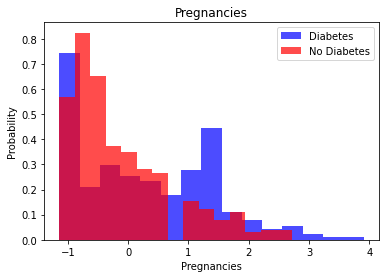

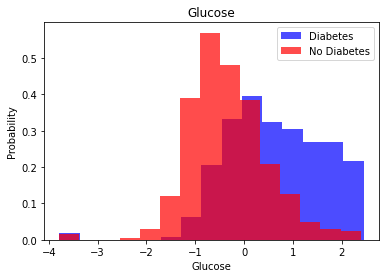

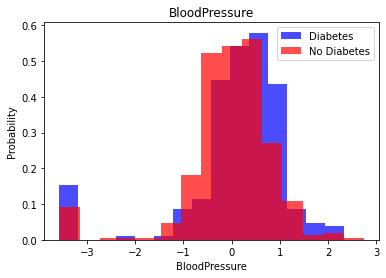

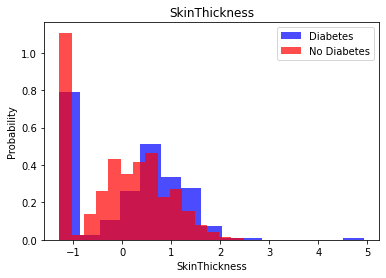

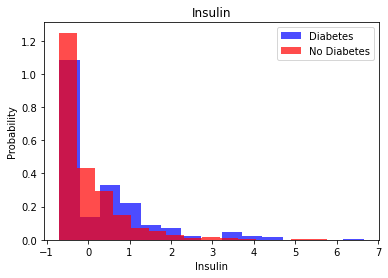

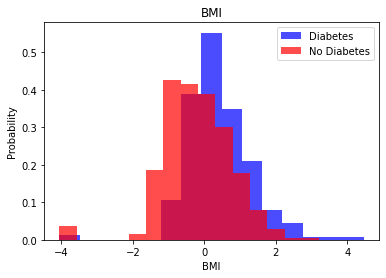

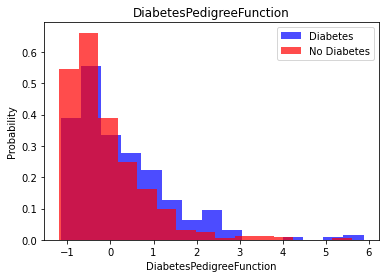

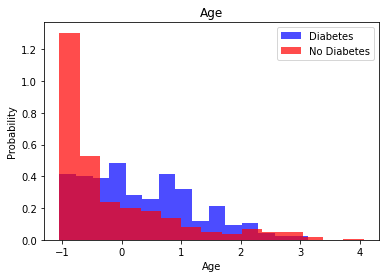

In [32]:
for i in range(len(df.columns[:-1])) :
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label],color= 'blue',label="Diabetes", alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label],color= 'red',label="No Diabetes", alpha=0.7, density=True, bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [26]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [38]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data = np.hstack((X, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [39]:
len(transformed_df[transformed_df["Outcome"]==1]), len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [40]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)


In [41]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(16, activation='relu'),# if x<=0-->0, x > 0 -->x
                             tf.keras.layers.Dense(16, activation='relu'),
                             tf.keras.layers.Dense(1, activation="sigmoid")
])

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [43]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5700


[0.6747106313705444, 0.5699999928474426]

In [44]:
model.evaluate(X_valid, y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.5700


[0.6685284972190857, 0.5699999928474426]

In [45]:
model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6475 - accuracy: 0.6283 - val_loss: 0.6128 - val_accuracy: 0.6800
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.6011 - accuracy: 0.7083 - val_loss: 0.5800 - val_accuracy: 0.7350
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7383 - val_loss: 0.5513 - val_accuracy: 0.7500
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5419 - accuracy: 0.7533 - val_loss: 0.5290 - val_accuracy: 0.7600
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5236 - accuracy: 0.7517 - val_loss: 0.5114 - val_accuracy: 0.7650
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5089 - accuracy: 0.7650 - val_loss: 0.4973 - val_accuracy: 0.7650
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.7583 - val_loss: 0.4831 - val_accuracy: 0.7700
Epoch 8/20
38/38 [==

In [46]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5082 - accuracy: 0.7600


[0.5081887245178223, 0.7599999904632568]